# Métodos Numéricos II - Lista 2 #
## Arthur Mendonça Sasse - DRE 117206692 ##

In [1]:
using Pkg
Pkg.add("CSV")
using CSV
using LinearAlgebra
using Images
using DataFrames
using Plots
using FileIO
using Statistics

In [2]:
function svd_k_componentes(A, k)
    U, S, V = svd(A)
    
    # Pega k colunas da base U
    U = U[:, 1:k]
    
    # Monta a sigma com k valores singulares na diagonal
    Σ = Diagonal(S[1:k])
    
    # Pega k linhas de Vt
    Vt = V'
    Vt = Vt[1:k, :]
    
    
    # S[n+1:end] .= 0
    
    # Montando a sigma, com os n componentes na diagonal
    #Σ = Diagonal(S)
    
    # Pegando a transposta de V
    #Vt = V'
    
    return U, Σ, Vt
end

svd_k_componentes (generic function with 1 method)

In [3]:
function compressao_svd(A, k, error_percentage=false)
    # Faz o SVD com k componentes
    U, Σ, Vt = svd_k_componentes(A, k)
    
    # Reconstroi a matriz com k componentes
    Aₖ = U * Σ * Vt
    
    # Calcula o erro
    erro = norm(A - Aₖ)
    
    # Calcula o erro em porcentagem da norma original da matriz
    if error_percentage
        # (100 * Norma do erro) / Norma da matriz original
        erro_percentual = (100 * erro) / norm(A)
        # Arredonda para 2 dígitos decimais
        erro_percentual = round(erro_percentual, digits = 2)
        erro = erro_percentual
    end
    
    return Aₖ, erro
end

compressao_svd (generic function with 2 methods)

## 1) ##

#### (a) ####

In [4]:
# Matriz original
user_movie_matrix = [0.82 0.18 0.5 0.1 0.26;
                     0.74 0.26 0.5 0.2 0.32;
                     0.34 0.69 0.5 0.7 0.62;
                     0.58 0.42 0.5 0.4 0.44;
                      0.1  0.9 0.5   1  0.8]

5×5 Matrix{Float64}:
 0.82  0.18  0.5  0.1  0.26
 0.74  0.26  0.5  0.2  0.32
 0.34  0.69  0.5  0.7  0.62
 0.58  0.42  0.5  0.4  0.44
 0.1   0.9   0.5  1.0  0.8

In [5]:
# Matriz transposta
movie_user_matrix = user_movie_matrix'

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 0.82  0.74  0.34  0.58  0.1
 0.18  0.26  0.69  0.42  0.9
 0.5   0.5   0.5   0.5   0.5
 0.1   0.2   0.7   0.4   1.0
 0.26  0.32  0.62  0.44  0.8

##### Resposta #####

In [6]:
U, Σ, Vt = svd_k_componentes(movie_user_matrix, 2)
U

5×2 Matrix{Float64}:
 -0.383909  -0.801181
 -0.476548   0.295342
 -0.427213  -0.255515
 -0.481342   0.426567
 -0.45969    0.153734

In [7]:
Σ

2×2 Diagonal{Float64, Vector{Float64}}:
 2.53781   ⋅ 
  ⋅       1.06844

In [8]:
Vt

2×5 Matrix{Float64}:
 -0.308078  -0.340833  -0.510243  -0.406344  -0.602875
 -0.607369  -0.476709   0.184886  -0.215388   0.568575

##### Extra ######

In [9]:
# Reconstruindo a matriz original com apenas 2 componentes
A2 = U * Σ * Vt

5×5 Matrix{Float64}:
 0.820073   0.740139  0.338859  0.580271  0.100668
 0.180928   0.261772  0.675424  0.423461  0.908528
 0.499827   0.499669  0.502724  0.499353  0.498407
 0.0995192  0.199082  0.707554  0.398206  0.99558
 0.259642   0.319316  0.625622  0.438665  0.796711

In [10]:
# Verificando a norma de Frobenius da diferença entre as matrizes
norm(movie_user_matrix - A2)

0.020957428490506386

#### (b) ####

In [11]:
coords = Σ * Vt

2×5 Matrix{Float64}:
 -0.781844  -0.864971  -1.2949   -1.03122   -1.52998
 -0.648937  -0.509334   0.19754  -0.230129   0.607487

In [12]:
bases = U

5×2 Matrix{Float64}:
 -0.383909  -0.801181
 -0.476548   0.295342
 -0.427213  -0.255515
 -0.481342   0.426567
 -0.45969    0.153734

In [13]:
# Separando as colunas
x = bases[:, 1]
y = bases[:, 2]

5-element Vector{Float64}:
 -0.8011810129396574
  0.295342210584965
 -0.2555150500375136
  0.4265674035901663
  0.15373442213909444

In [14]:
# Definindo nomes do filmes
labels = text.(["Titanic", "Rocky", "The Hobbit", "Fight Club", "Jurassic Park"], :left, 10)
colors = [:blue, :red, :green, :yellow, :orange]

5-element Vector{Symbol}:
 :blue
 :red
 :green
 :yellow
 :orange

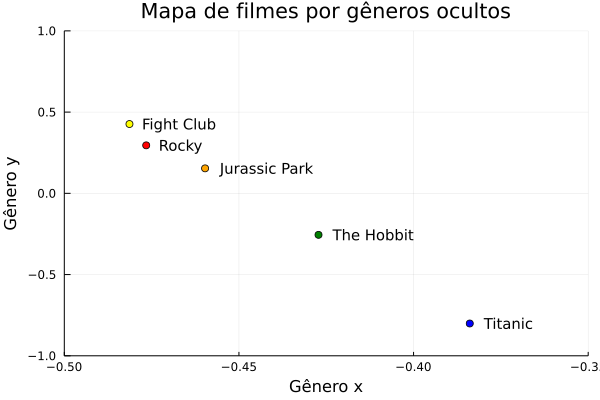

In [15]:
scatter(x, y, title = "Mapa de filmes por gêneros ocultos",
        xlabel = "Gênero x", ylabel = "Gênero y", 
        color=colors, xlims = (-0.5, -0.35), ylims = (-1, 1), lab=:none)
annotate!(x.+0.004, y, labels)

#### (c) ####

Recomendaria "The Hobbit" já que é o filme mais próximo de "Titanic" no gráfico 2D que fizemos dos filmes.

De maneira mais vetorial, podemos dizer que no espaço vetorial gerado pela matriz Usuarios X Gênero, "Titanic" e "The Hobbit" possuem as coordenadas mais próximas.

## 2) ##

Branco = 1

Cinza = 0.5

Preto = 0

In [16]:
smile = [1 0   1 0 1;
         1 0   1 0 1;
         1 1 0.5 1 1;
         0 1   1 1 0;
         1 0   0 0 1]

5×5 Matrix{Float64}:
 1.0  0.0  1.0  0.0  1.0
 1.0  0.0  1.0  0.0  1.0
 1.0  1.0  0.5  1.0  1.0
 0.0  1.0  1.0  1.0  0.0
 1.0  0.0  0.0  0.0  1.0

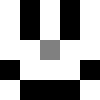

In [17]:
display(Gray.(smile))

┌ Info: Saved animation to 
│   fn = /Users/artsasse/Desktop/UFRJ/2021.1 Remoto/Métodos Numéricos 2/Lista 2/tmp.gif
└ @ Plots /Users/artsasse/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/Users/artsasse/Desktop/UFRJ/2021.1 Remoto/Métodos Numéricos 2/Lista 2/tmp.gif")
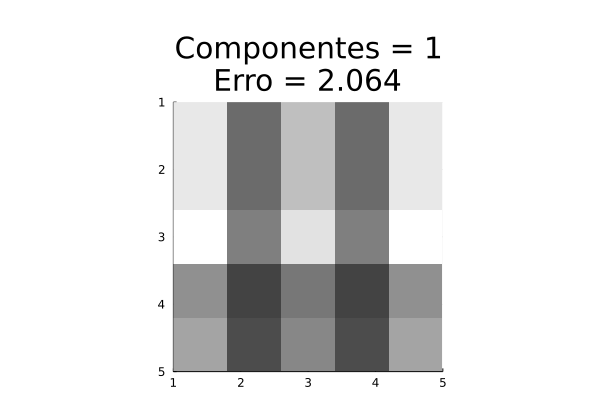

In [18]:
anim = @animate for k = 1:5
    Sₖ, erroₖ = compressao_svd(smile, k)
    plot(Gray.(Sₖ), color=:greys, 
        title=" \nComponentes = $(k)\nErro = $(round(erroₖ, digits=3))\n ",
        titlefont=20)
end

gif(anim, fps=0.7)

##### RESPOSTA #####
Podemos concluir que a matriz da imagem tem posto 3, já que quando usamos apenas 3 componentes, a imagem reconstruída é idêntica à original e o erro é zero. Depois disso, aumentar o número de componentes não faz diferença.

## 3) ##

In [19]:
function compressao_img(img_path, k)
    # Carrega imagem
    img = load(img_path)
    
    # Transforma em matriz de floats (escala de cinza)
    img_matrix = Float64.(Gray.(img))
    compressed_img, erro = compressao_svd(img_matrix, k)
    
    # (100 * Norma do erro) / Norma da matriz original
    erro_percentual = (100 * erro) / norm(img_matrix)
    # Arredonda para 2 dígitos decimais
    erro_percentual = round(erro_percentual, digits = 2)
    
    # Mostra a imagem comprimida e o erro
    #display(Gray.(compressed_img))
    #display("Erro = $(erro_percentual)%")
    plot(Gray.(compressed_img), color=:greys, 
        title=" \nComponentes = $(k)\nNorma Recuperada = $(100 - erro_percentual)%\n ",
        titlefont=15)
end

compressao_img (generic function with 1 method)

#### (a) ####

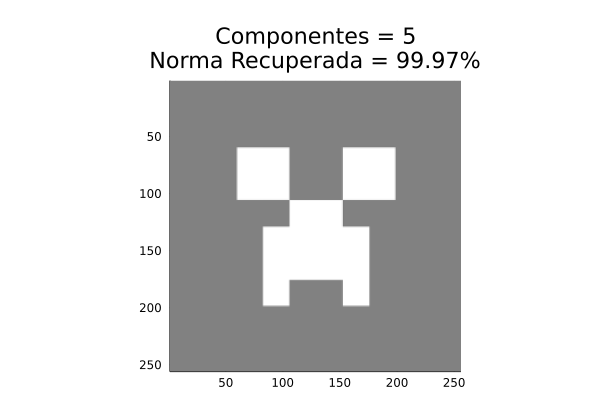

In [20]:
compressao_img("icons/creeper.png", 5)

#### (b) ####

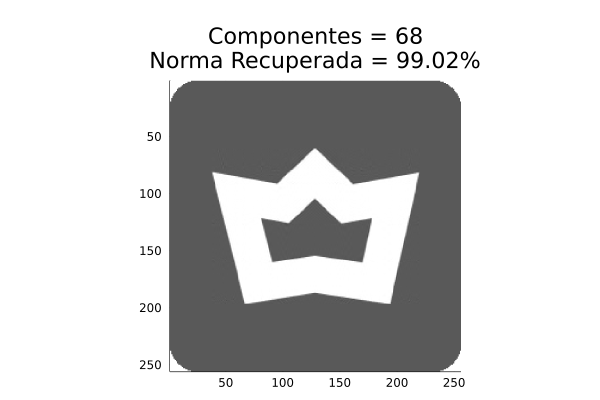

In [21]:
compressao_img("icons/winnin.png", 68)

## 4) ##

#### (a) ####

**Dica de Larissa Galeno (colega de turma):**

Provavelmente o erro surgiu porque os valores de cada característica do vinho não foram normalizados.

Por conta disso, características como Prolina (que varia em torno de 1000) e Magnésio (em torno de 100) influenciam muito mais a norma da matriz do que valores como Não-Flavonoides (que variam em torno de 0.30).

Para corrigir isso, precisamos subtrair o valor em cada coluna pela média dos valores da coluna e depois dividir pela variância da coluna. (Já que cada coluna representa uma característica do vinho)

#### (b) ####

In [22]:
wine_matrix = [14.23 1.71 2.43 15.6 127 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065;
               13.20 1.78 2.14 11.2 100 2.65 2.76 0.26 1.28 4.38 1.05 3.40 1050;
               13.16 2.36 2.67 18.6 101 2.80 3.24 0.30 2.81 5.68 1.03 3.17 1185;
               14.37 1.95 2.50 16.8 113 3.85 3.49 0.24 2.18 7.80 0.86 3.45 1480;
               13.24 2.59 2.87 21.0 118 2.80 2.69 0.39 1.82 4.32 1.04 2.93 735]

5×13 Matrix{Float64}:
 14.23  1.71  2.43  15.6  127.0  2.8   …  2.29  5.64  1.04  3.92  1065.0
 13.2   1.78  2.14  11.2  100.0  2.65     1.28  4.38  1.05  3.4   1050.0
 13.16  2.36  2.67  18.6  101.0  2.8      2.81  5.68  1.03  3.17  1185.0
 14.37  1.95  2.5   16.8  113.0  3.85     2.18  7.8   0.86  3.45  1480.0
 13.24  2.59  2.87  21.0  118.0  2.8      1.82  4.32  1.04  2.93   735.0

In [23]:
# Seleciona a dimensao das colunas
vectors = size(wine_matrix)[2]

wine_matrix_n = Array{Float64,2}(undef, size(wine_matrix))
# Normalizar todos os vetores (colunas) da matriz
for i = 1:vectors
    media = mean(wine_matrix[:,i])
    variancia = var(wine_matrix[:,i])
    
    # Normaliza a coluna i
    wine_matrix_n[:,i] = (wine_matrix[:,i] .- media)./variancia
end

# Mostra a matriz nova
wine_matrix_n

5×13 Matrix{Float64}:
  1.61092  -2.52799   -1.2354    …    5.51302   4.01973   -0.000526808
 -1.20137  -2.04713   -5.12958        7.04441   0.191416  -0.000734759
 -1.31058   1.93721    1.98738        3.98162  -1.50188    0.0011368
  1.99317  -0.879302  -0.295421     -22.0521    0.559523   0.00522649
 -1.09215   3.51721    4.67302        5.51302  -3.26879   -0.00510172

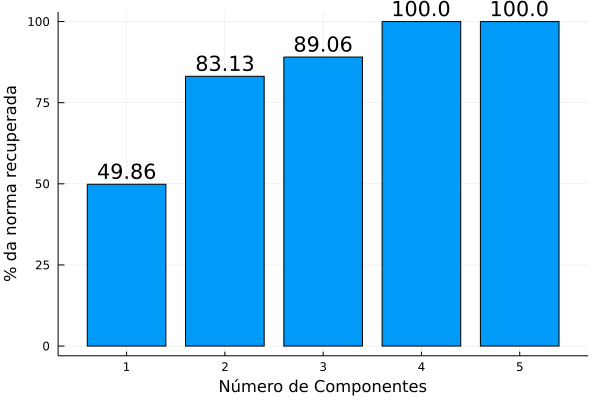

In [24]:
x = Float64[]
y = Float64[]
for k = 1:5
    # Calcula o erro com k componentes
    Aₖ, erroₖ = compressao_svd(wine_matrix_n, k, true)
    
    # Calcula a norma recuperada com k componentes
    rec_norm = 100 - erroₖ
    push!(x, k)
    push!(y, rec_norm) 
end

# Plota barras correspondentes às porcentagens restauradas da norma original
bar(x, y, xlabel="Número de Componentes", ylabel="% da norma recuperada", label=:none)

# Transforma valores em texto
labels = text.(y)
annotate!(x, y.+4, labels)

##### RESPOSTA #####
Precisamos de 2 componentes para atingir mais de 80% da norma total do dataset.

## 5) ##

In [44]:
# Implementacao do K-Means inspirada no Alternating Least Squares
"""
Entrada:
    A -> matriz
    k -> numero de clusters
Retorna:
    C -> matriz com os vetores dos centroides
    I -> matriz indicadora (matriz onde cada coluna só pode ter um '1' e o resto é todo zerado). 
"""
function kmeans(A, k)
    # Pega o numero de vetores (colunas) da matriz
    n = size(A)[2]
    # Pega o numero de linhas da matriz
    m = size(A)[1]
    
    # Constroi a matriz indicadora
    indicadora = zeros(k, n)
    
    # Constroi a matriz dos primeiros centroides (aleatorios)
    centroides = escolhe_centroides(A, k)
    
    novos_centroides = zeros(size(centroides))
    #diferenca = norm(centroides - novos_centroides)
    diferenca = Inf
    
    # Enquanto o novo centroide for diferente do ultimo
    ϵ = 10^(-3)
    t=0
    while(t<10000) 
        # Calcular a coluna indicadora para cada vetor (ver qual o centroide mais proximo de cada vetor)
        for i = 1:n
            # Seleciona o vetor da coluna i
            vetor = A[:, i]
            # Descobre qual a linha correspondente ao centroide mais proximo
            linha = mais_proximo(vetor, centroides)
            # Preenche com 1 na linha do centroide mais proximo
            indicadora[linha, i] = 1
        end
        
        # Calcular os novos centroides (médias dos pontos de cada cluster)
        novos_centroidesᵀ = indicadora' \ A'
        novos_centroides = novos_centroidesᵀ'
        
        diferenca = norm(centroides*indicadora - novos_centroides*indicadora)
        t=t+1
    end
    
    return centroides, indicadora
end

# Retorna o indice do centroide mais proximo do vetor passado como argumento
function mais_proximo(vetor, centroides)
    menor_distancia = Inf
    centroide = Inf
    # Compara com cada coluna da matriz de centroides
    for i in size(centroides)[2]
        distancia = norm(vetor - centroides[:,i])
        if distancia < menor_distancia
            menor_distancia = distancia
            centroide = i
        end
    end
    return centroide
end

function escolhe_centroides(A, k)
    # Pega o numero de vetores (colunas) da matriz
    n = size(A)[2]
    # Pega o numero de linhas da matriz
    m = size(A)[1]
    
    centroides = zeros(m, k)
    
    # Escolhe os primeiros centroides aleatoriamente
    escolhidos = Int[]
    for i = 1:k
        # Seleciona um inteiro aleatorio
        escolhido = rand(1:n)
        
        # Verifica se o numero nao é repetido
        while escolhido ∈ escolhidos
            escolhido = rand(1:n)
        end
        
        # Adiciona na lista de escolhidos
        push!(escolhidos, escolhido)
    end
    
    # Seleciona os vetores (centroides) referentes aos numeros escolhidos aleatoriamente
    for i = 1:k
        col = escolhidos[i]
        # Adiciona coluna escolhida em centroides
        centroides[:,i] = A[:,col]
    end
    
    return centroides
end

escolhe_centroides (generic function with 1 method)

In [70]:
function normaliza(A)
    vectors = size(A)[2]
    An = zeros(size(A))
    # Normalizar todos os vetores (colunas) da matriz
    for i = 1:vectors
        media = mean(A[:,i])
        variancia = var(A[:,i])

        # Normaliza a coluna i
        An[:,i] = (A[:,i] .- media)./variancia
    end
    return An
end

normaliza (generic function with 1 method)

In [89]:
k = 2
wine_matrix_n = normaliza(wine_matrix)
U, Σ, Vt = svd_k_componentes(wine_matrix, k)
coord = Σ * Vt
cent, ind = kmeans(coord, 2)

ind

2×13 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [88]:
colors = [:red, :blue]
# Linhas
for i = 1:k
    lista = Float64[]
    # Coluna
    for j = 1:size(coord)[2]
        print(ind[i,j])
        if ind[i,j] == 1
           push!(lista, coord[:,j])
        end
    end
    print(lista)
    scatter!(lista[1,:], lista[2,:])
end
#x = coord[1,:]
#y = coord[2,:]
#scatter(x, y, lab=:none)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]0.00.00.00.00.00.00.00.00.00.00.00.00.0Float64[]

LoadError: BoundsError: attempt to access 0-element Vector{Float64} at index [1, 1:1]

## 6) ##

In [27]:
vg_sales = CSV.read("data/vgsales.csv", DataFrame)

,Rank,Name,Platform,Year,Genre
,Int64,String,String,String,String
1,1,Wii Sports,Wii,2006,Sports
2,2,Super Mario Bros.,NES,1985,Platform
3,3,Mario Kart Wii,Wii,2008,Racing
4,4,Wii Sports Resort,Wii,2009,Sports
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing
6,6,Tetris,GB,1989,Puzzle
7,7,New Super Mario Bros.,DS,2006,Platform
8,8,Wii Play,Wii,2006,Misc
9,9,New Super Mario Bros. Wii,Wii,2009,Platform
